Make Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


/var/folders/c6/crzzww216wnbsh4l_w06smhm0000gp/T/ipykernel_62432/155730699.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Perform the read of the dataset.

In [2]:
movies = pd.read_csv('./data/movies.csv')
ratings = pd.read_csv('./data/ratings.csv')

Explore the dataset.

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [5]:
movies.duplicated().sum()

0

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
ratings.duplicated().sum()

0

In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


'.groupby' is used to group the ratings dataset according to 'moveiId' as seend below. 

In [10]:
list(ratings.groupby('movieId'))

[(1,
         userId  movieId  rating   timestamp
  0           1        1     4.0   964982703
  516         5        1     4.0   847434962
  874         7        1     4.5  1106635946
  1434       15        1     2.5  1510577970
  1667       17        1     4.5  1305696483
  ...       ...      ...     ...         ...
  97364     606        1     2.5  1349082950
  98479     607        1     4.0   964744033
  98666     608        1     2.5  1117408267
  99497     609        1     3.0   847221025
  99534     610        1     5.0  1479542900
  
  [215 rows x 4 columns]),
 (2,
         userId  movieId  rating   timestamp
  560         6        2     4.0   845553522
  1026        8        2     4.0   839463806
  1773       18        2     3.0  1455617462
  2275       19        2     3.0   965704331
  2977       20        2     3.0  1054038313
  ...       ...      ...     ...         ...
  95102     600        2     4.0  1237764627
  95965     602        2     4.0   840875851
  97044     604

The below is used to pick out only the rating column from the ratings dataset. So now we have a dataframe grouped by moveiId with only ratings column. So each group is a movieId group with its specifc rating.

In [11]:
list(ratings.groupby('movieId')['rating'])

[(1,
  0        4.0
  516      4.0
  874      4.5
  1434     2.5
  1667     4.5
          ... 
  97364    2.5
  98479    4.0
  98666    2.5
  99497    3.0
  99534    5.0
  Name: rating, Length: 215, dtype: float64),
 (2,
  560      4.0
  1026     4.0
  1773     3.0
  2275     3.0
  2977     3.0
          ... 
  95102    4.0
  95965    4.0
  97044    5.0
  97144    3.5
  98667    2.0
  Name: rating, Length: 110, dtype: float64),
 (3,
  1        4.0
  561      5.0
  2276     3.0
  4930     3.0
  5875     4.0
  6316     5.0
  6430     3.0
  7423     4.0
  8511     3.0
  9429     3.5
  10362    2.0
  14123    3.0
  15300    3.5
  15509    5.0
  18262    3.5
  18350    3.0
  22277    3.0
  22304    3.0
  24323    5.0
  25882    4.0
  30887    1.0
  33046    3.5
  35582    4.0
  39032    4.0
  39061    3.0
  42116    4.0
  43169    2.5
  43959    1.0
  45643    3.0
  46735    3.5
  47709    0.5
  49919    3.0
  50950    3.0
  51894    4.0
  55396    3.0
  61842    4.0
  62296    4.0
  68657 

The below '.agg' will aggregate the number of ratings specific to each group. Meaning it will count the number of ratings for each movieId. Note that its 'count' and not 'sum' so the number of ratings made for the movie is displayed.

This basically infers the number of users who voted for the respective movies.

The final dataframe will be having two columns. movieId and its respective aggregate count.  Here the first column will not be the index as in groupby we are grouping based on moveiId, so the index previously used will go away.

In [12]:
ratings.groupby('movieId')['rating'].agg('count')

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

Similarly the below means, how many movies the users have voted. Because this is an aggregation of the the usersId with ratings right. So, in short it means the number of ratings that the specific user gave.

In [13]:
ratings.groupby('userId')['rating'].agg('count')

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

In [14]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

The below '.pivot' command is used to strech out the dataframe according to the index and columns specified. Here the ratings dataset is expanded or pivoted to have the rows relating to the movieId and the columns relating to the userId. The itersection of these tow attributes is the rating value. For example, movieId 5 is rated by userId 6 as a 5.0 .

In [15]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
no_user_voted

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

The below is a scatte plot of the no_user_voted dataframe. As mentioned earlier the index of the dataframe will be the movieId and not the actual index. 

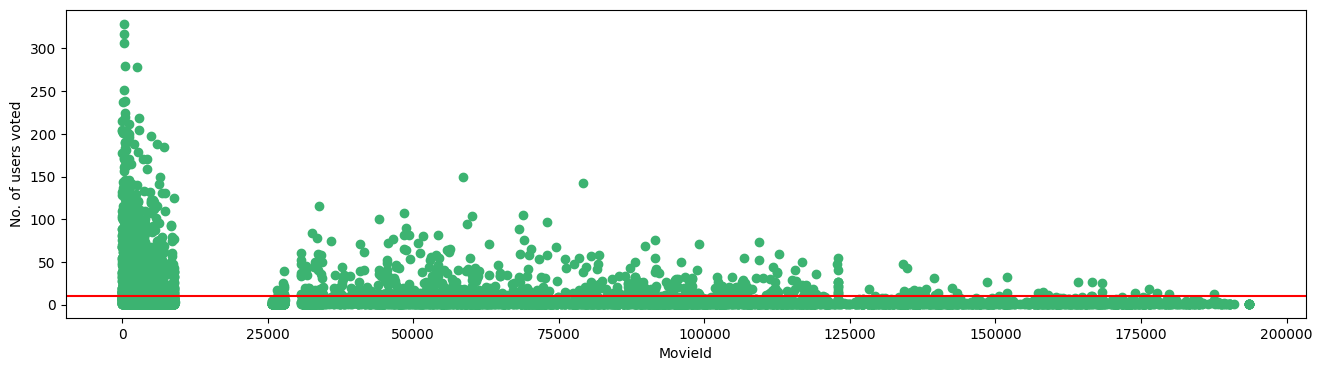

In [18]:
f, ax = plt.subplots(1, 1, figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

Here the statement 'no_user_voted > 10' is used to filter out the dataframe with users who have made more that 10 voted. This is done to have a good dataset as we dont need any users data which is less than 10 as it may cause discrepencied in the data. 

The statement 'no_user_voted[no_user_voted > 10].index' will filter out all the index matching this condition.

The statement 'final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]' will slice the dataframe based on the condition and will include all columns. That's what the ',:' is for.

In [19]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

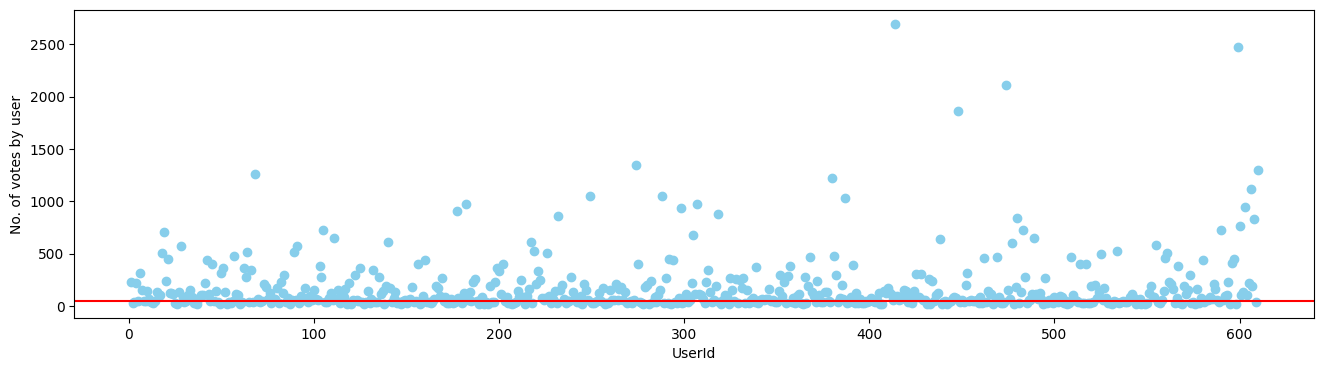

In [20]:
from turtle import color


f, ax = plt.subplots(1,1, figsize=(16,4))
plt.scatter(no_movies_voted.index, no_movies_voted, color='skyblue')
plt.axhline(y=50, color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [21]:
final_dataset = final_dataset.loc[:, list(no_movies_voted[no_movies_voted > 50].index)]
final_dataset.head()

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0


In the context of a movie recommendation system, a csr_matrix could be used to store the user-item matrix, where each element represents a user's rating for a movie. Since not every user rates every movie, this matrix can be very sparse (i.e., contain a lot of zeros), making csr_matrix an efficient choice for storing it.

In [22]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)
csr_data

<2121x378 sparse matrix of type '<class 'numpy.float64'>'
	with 72893 stored elements in Compressed Sparse Row format>

In [23]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [24]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [25]:
get_movie_recommendation('Iron Man')

,Title,Distance
1,Up (2009),0.368857
2,Guardians of the Galaxy (2014),0.368758
3,Watchmen (2009),0.368558
4,Star Trek (2009),0.366029
5,Batman Begins (2005),0.362759
6,Avatar (2009),0.310893
7,Iron Man 2 (2010),0.307492
8,WALL·E (2008),0.298138
9,"Dark Knight, The (2008)",0.285835
10,"Avengers, The (2012)",0.285319
